Visualize one of your datasets in an interactive animated way (examples can be seen in google charts).

# Importing data 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from ipywidgets import interact

from matplotlib import animation, rc
from IPython.display import HTML

In [9]:
data = pd.read_csv("../data/mall_customers.csv")

In [10]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
145,146,Male,28,77,97
90,91,Female,68,59,55
51,52,Male,33,42,60
30,31,Male,60,30,4
29,30,Female,23,29,87


In [11]:
print("Number of samples: {}".format(len(data)))

Number of samples: 200


In [12]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Visualizing data 

Interactively drawing every pair scatter plot.

In [13]:
@interact
def scatter_plot(x=list(data.columns[1:]), 
                 y=list(data.columns[1:])):
    sns.scatterplot(data[x], data[y])

interactive(children=(Dropdown(description='x', options=('Gender', 'Age', 'Annual Income (k$)', 'Spending Scor…

Interactively displaying income and spending score on a given age.

In [14]:
@interact
def scatter_plot(age=(np.min(data["Age"]), np.max(data["Age"]), 1)):
    display(data[data["Age"]==age][["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

interactive(children=(IntSlider(value=44, description='age', max=70, min=18), Output()), _dom_classes=('widget…

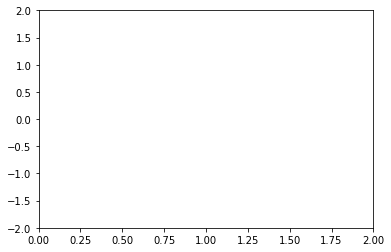

In [15]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [16]:
def init():
    line.set_data([], [])
    return (line,)

In [17]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [18]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [19]:
HTML(anim.to_html5_video())